### K - Means 
- Unsupervised learning.
- Common Clustering technique, helps to solve many problems efficiently
- K- Means is an example of Hard Clustering, where every point belongs only to one cluster.

### Motivation Problem - Pizza Parlour Study
- Problem Statement Given the list of location of customers who frequently we want to find out optimal locations of Pizza Parlours where they should be opened.

### Step -1 : Initialise Pizza Partour Centers Randomly
- Randomly assign k no. of locations u1, u2, u3,...uk

### Step 2:
- Assign each customer to its nearest Pizza Center.

### Step 3:
- Update the centre location by taking mean of customers assigned to it.
- What we do is we create a list for each centre nearest to them.
- We are going to update  centre location by taking the mean of customers assigned to it ie = u1 -->> mean of location of red, u2 -->> mean location of blue, u3 --->>> mean location of yellow

### Step 4:
- Repeat step 2 and 3 until convergence.

### For Example :
- Let uk denote the center of kth cluster (uk will be  a vector).
- So we need to find an assignment of data points clusters, as well as a set of cluster centers(uk), such that the sum of the squares of the distance of each data point to its closest cluster uk, is a minimum.we repeat this process till the point of convergence,So we update the cluster points by updating list of points in the cluster then take the mean of points update the mean with new mean and then again find the set of new points.
- We follow  all 4 steps to get required .

### Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
type(make_blobs)

function

In [3]:
type(np), type(plt)

(module, module)

### Dataset Preparation

In [4]:
X, y = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [5]:
X, y = make_blobs(n_samples= 500, n_features= 2, centers = 5, random_state= 3)

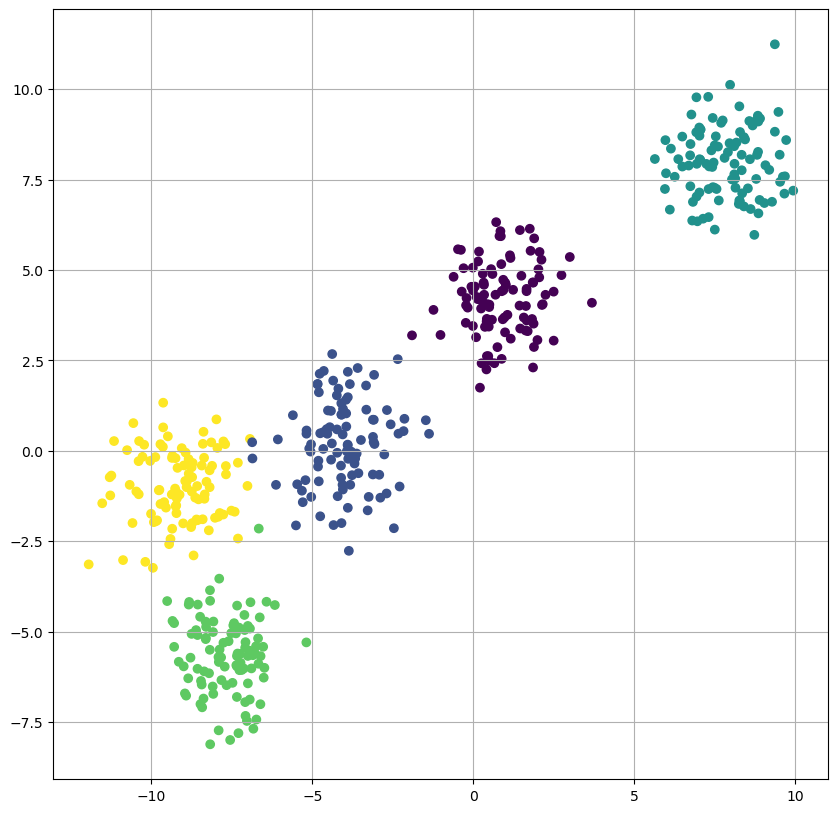

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1],c= y)
plt.grid()
plt.show()

In [15]:
X.shape

(500, 2)

### Lets create a K-means code, by creating the  dataset by Ourselfs

In [20]:
k = 5 #I would have 5 clusters.
color = ["green", "red", "yellow", "voilet", "orange"]
#color for each of the clusters.

clusters = {} 
# empty dictionary for the clusters.
# clusters is an empty dictionary.

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],)) -1) 
#np.random.random((X.shape[1],)) generates an array of random numbers uniformly distributed between 0 and 1. The shape of this array is determined by X.shape[1], meaning the number of columns in the array X.
#2 * np.random.random((X.shape[1],)) - 1 transforms the range from [0, 1] to [-1, 1] by multiplying the array by 2 and then subtracting 1.
#10 * (2 * np.random.random((X.shape[1],)) - 1) scales the resulting array to be within the range [-10, 10].
#So, center will be a random vector with values between -10 and 10, with the same length as the number of columns in X.

    points = [] 
    #list of points near cluster 
    #So each cluster we are going to associate list of points

    cluster = {
                "center" : center,
                "points" : points,
                "color"  : color[i] #random color generator krke dekhna h
                }
    # creating a cluster dict with center , points and color
    clusters[i] = cluster # I did not get this point
print(clusters)



{0: {'center': array([8.04637862, 9.1646226 ]), 'points': [], 'color': 'green'}, 1: {'center': array([ 6.44598558, -5.57180315]), 'points': [], 'color': 'red'}, 2: {'center': array([-6.91575131, -3.57857881]), 'points': [], 'color': 'yellow'}, 3: {'center': array([ 7.93082805, -2.94999839]), 'points': [], 'color': 'voilet'}, 4: {'center': array([-1.86615766, -0.91875859]), 'points': [], 'color': 'orange'}}


In [21]:
def distance(v1, v2):
    
    return np.sqrt(np.sum((v1-v2)**2))

### Step 2: 
- E Step and  M step.
- K means is special case of exceptation and maximization algorthim.

### E - Step :

In [25]:
def assignPointToclusters(clusters):
    for ix in range(X.shape[0]): #iterating over all the data points
        dist = [] #list of distance 
         #my current data point(x, y axis values)
        
#compute distance of my current data point from all the center  points
        for kx in range(k):
            
#computing distance of current data point from the center of k-th cluster
            d = distance( X[ix], clusters[kx]['center'])
            dist.append(d)
        current_cluster_index = np.argmin(dist)
        # arg min returns the index 
        # therefore current_cluster_index will return the 
        # smallest distance of my point from all 5 clusters
        # current_cluster_index = 4 , it means the point is closest 
        # the cluster 4 
        
        clusters[current_cluster_index]['points'].append( X[ix])

    print(clusters)

In [26]:
X.shape, X[1]

((500, 2), array([8.14492336, 7.52724561]))

In [27]:
result = assignPointToclusters(clusters)
print((result))


{0: {'center': array([8.04637862, 9.1646226 ]), 'points': [array([8.14492336, 7.52724561]), array([7.44598269, 9.20313614]), array([8.73872704, 5.97009465]), array([8.84851188, 9.26501008]), array([8.27287322, 6.92062212]), array([6.96905011, 6.3449164 ]), array([7.03293513, 7.14165643]), array([7.31936447, 6.46038969]), array([8.62460249, 6.68412192]), array([9.37763125, 8.82221751]), array([7.33596746, 7.8622887 ]), array([6.69914682, 7.88649907]), array([8.79679601, 7.51599724]), array([7.51057077, 6.11484261]), array([2.12414555, 5.28234711]), array([8.27421397, 9.52409703]), array([8.81683548, 9.15218311]), array([2.74537548, 4.85700872]), array([9.62662186, 7.57682932]), array([8.12306558, 7.9346747 ]), array([6.75075574, 7.31450863]), array([8.68547494, 8.9951675 ]), array([8.04420692, 7.50306905]), array([7.50149836, 7.27394157]), array([8.11549925, 7.64335676]), array([5.64814745, 8.0676723 ]), array([7.81447892, 8.09824746]), array([8.86147492, 9.10408388]), array([7.63489548

### Plotting of Cluster

In [37]:
def plotClusters(clusters):
 #iterative over all the clusters    
    for kx in range(k):
        print(len(clusters[kx]['points']))
        print(type(clusters[kx]['points']))

        pts = np.array(clusters[kx]['points'])#to use matplotlib library we 
        # have to convert the points into the arry

        # plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1], color =clusters[kx]['color'])
        except:
            pass
       # plot the cluster center
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1], color = "red", marker = "*")
         
    

In [38]:
clusters[0]['center']

array([8.04637862, 9.1646226 ])

218
<class 'list'>
0
<class 'list'>
422
<class 'list'>
0
<class 'list'>
360
<class 'list'>


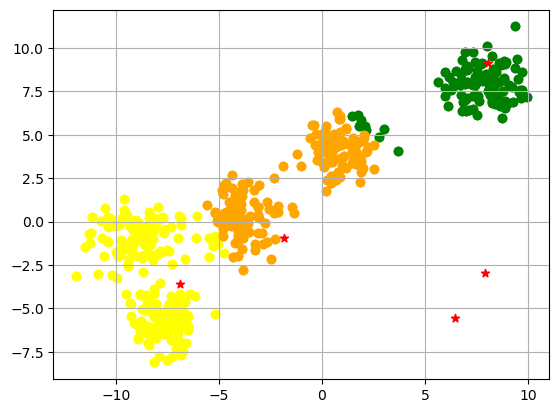

In [39]:
plt.grid()
plotClusters(clusters)
plt.show()

#sometimes we dont get any point in cluster as our intialization isnot good
#to avoid this we can try and except method


### M - Step

In [40]:
def updateClusters(clusters): # Msteps ->> We update every cluster center 
#according to the mean of the points 
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0 :#if a cluster has non zero points
            new_mean = pts.mean(axis = 0) # along the rows 
        clusters[kx]['center'] = new_mean # updated center
        clusters[kx]['points'] = [] # now we will gather new points for new 
        #cluster in E step
         
    

### E and M step

{0: {'center': array([8.04637862, 9.1646226 ]), 'points': [array([8.14492336, 7.52724561]), array([7.44598269, 9.20313614]), array([8.73872704, 5.97009465]), array([8.84851188, 9.26501008]), array([8.27287322, 6.92062212]), array([6.96905011, 6.3449164 ]), array([7.03293513, 7.14165643]), array([7.31936447, 6.46038969]), array([8.62460249, 6.68412192]), array([9.37763125, 8.82221751]), array([7.33596746, 7.8622887 ]), array([6.69914682, 7.88649907]), array([8.79679601, 7.51599724]), array([7.51057077, 6.11484261]), array([2.12414555, 5.28234711]), array([8.27421397, 9.52409703]), array([8.81683548, 9.15218311]), array([2.74537548, 4.85700872]), array([9.62662186, 7.57682932]), array([8.12306558, 7.9346747 ]), array([6.75075574, 7.31450863]), array([8.68547494, 8.9951675 ]), array([8.04420692, 7.50306905]), array([7.50149836, 7.27394157]), array([8.11549925, 7.64335676]), array([5.64814745, 8.0676723 ]), array([7.81447892, 8.09824746]), array([8.86147492, 9.10408388]), array([7.63489548

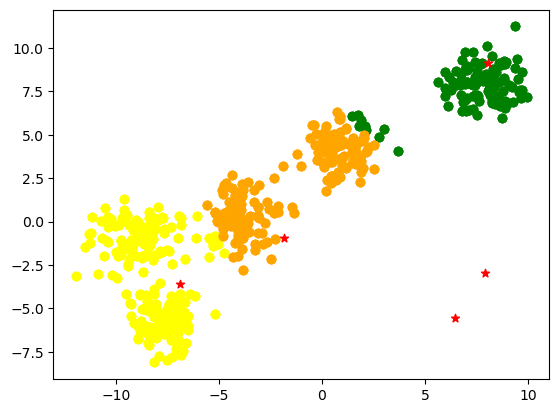

In [41]:
assignPointToclusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

### Mathematics Behind The K-means Algorithm
-  It is happening because , of the local minima , so the initalization
has to be on point
- that is why we are able to see 4 points
- It has 0 points , we can't update it anyway, that is why are able to see only 4 algorithms

### K-means ++ :
- Kind of an initialization just like np.random.random.
- Used in scikit-learn.
- K-means is quite sensitive to initialize, if the initialization is not good , our algorithm is not able to make desired number of clusters.
- To overcome this problem, we user technique called K-means++, which choose initial centers so that they are statistically close to final ones.
- The method is default choice for sklearn, so we will use it directly without going  into  the details of it

### Using Scikit Learn

In [42]:
 X, y = make_blobs(n_samples= 500, n_features= 2, centers = 5, random_state= 3)

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters =5)

In [45]:
kmeans.fit(X,y)# training part is done

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [46]:
centers = kmeans.cluster_centers_
centers

array([[ 7.8649674 ,  7.97988109],
       [-9.0671623 , -0.96740759],
       [ 0.88641907,  4.19441853],
       [-7.6726196 , -5.69211059],
       [-3.97953526,  0.19458336]])

In [47]:
pred = kmeans.labels_
print(pred)

[3 0 4 3 3 4 1 3 0 3 0 4 0 3 4 3 0 3 3 0 2 2 3 4 3 2 1 1 4 1 3 1 2 2 3 2 0
 0 3 2 2 2 1 1 4 0 0 1 1 1 0 3 1 3 3 2 3 3 0 4 0 4 4 3 1 0 4 4 2 4 2 3 2 3
 2 4 3 1 2 2 4 2 4 1 0 1 4 0 1 4 1 2 3 2 2 0 3 4 4 2 0 2 4 4 0 0 0 4 4 3 0
 1 3 0 4 2 0 1 2 4 0 4 1 3 2 1 1 1 3 3 4 4 3 0 0 1 4 1 4 3 3 2 4 0 1 3 0 0
 3 4 3 3 4 4 0 2 2 1 4 3 2 0 1 2 0 2 0 2 2 2 1 3 2 0 2 1 3 4 0 1 0 3 0 2 1
 1 2 3 4 0 2 4 1 3 1 2 4 1 3 3 3 2 2 0 3 1 1 3 0 3 3 3 2 0 4 0 3 3 0 1 4 1
 1 2 3 4 3 4 1 2 4 4 3 2 3 2 4 0 4 2 2 0 3 3 4 4 2 0 2 3 1 0 1 3 1 1 1 1 0
 2 0 3 2 0 1 4 0 0 0 1 3 3 4 2 2 0 4 4 3 4 1 4 0 0 1 1 2 1 1 0 2 3 4 2 4 1
 4 4 0 3 2 0 2 2 3 1 2 4 2 1 3 3 4 0 2 1 0 2 4 1 0 1 3 2 1 4 4 2 2 2 3 1 2
 3 0 4 4 1 0 0 4 4 1 2 2 2 3 1 0 1 3 2 0 0 4 2 2 1 2 1 4 4 4 1 2 3 2 4 1 1
 0 3 0 1 3 1 4 0 2 0 4 3 3 0 0 2 0 2 1 4 0 1 3 3 0 4 2 1 3 3 3 1 0 2 0 0 0
 1 2 4 0 4 4 1 4 3 4 3 0 2 2 3 0 1 3 2 4 0 1 4 1 1 0 1 4 1 0 1 4 1 3 2 2 1
 2 0 2 2 1 3 3 4 1 2 4 1 4 0 4 0 3 2 4 3 4 3 3 2 3 2 1 0 0 4 3 3 1 1 0 1 1
 0 1 0 0 0 1 2 1 4 0 4 4 

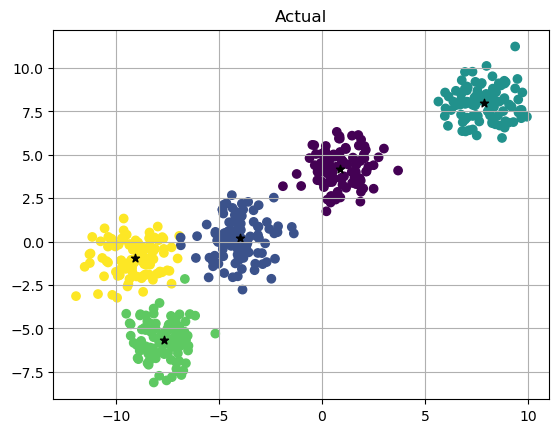

In [30]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(centers[:,0], centers[:,1], color = "black", marker= "*")
plt.title("Actual")
plt.grid()
plt.show()

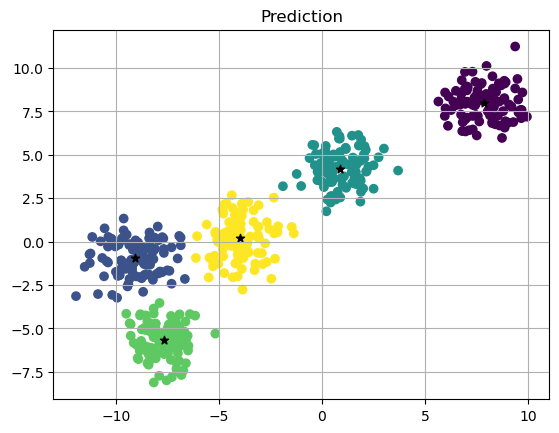

In [48]:
plt.scatter(X[:,0], X[:,1], c = pred)
plt.scatter(centers[:,0], centers[:,1], color = "black", marker= "*")
plt.title("Prediction")
plt.grid()
plt.show()

### K- Means And DBSCAN:

In [57]:
import matplotlib.pyplot as plt

In [58]:
from sklearn.datasets import make_circles, make_moons

In [59]:
X, Y = make_moons(n_samples= 200, noise= 0.10)
pred = kmeans.labels_
print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

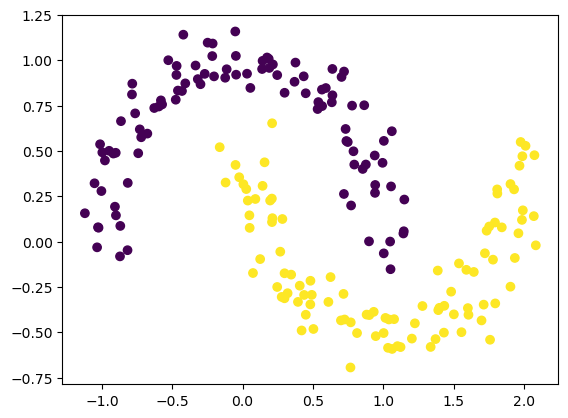

In [60]:
plt.scatter(X[:, 0], X[:, 1], c= Y)
plt.show()
# non convex data , wont converge

In [53]:
from sklearn.cluster import KMeans

In [61]:
km = KMeans(n_clusters =2)
km.fit(X)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

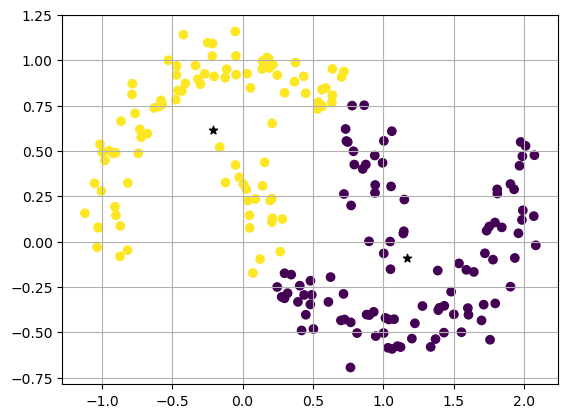

In [62]:
centers = km.cluster_centers_
label = km.labels_
plt.scatter(X[:, 0], X[:, 1], c= label)
plt.scatter(centers[:, 0], centers[:, 1], color= 'black',marker = "*")
plt.grid()
plt.show()

### DBSCAN :
- Density Based Spatial Clustering of Applications with Noise
- Based upon the idea , that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area , if density is "good enough" it considered as part of cluster and explores neighbours and so on, so it groups regions based upon density.
- neighbours should have some minimum distance so that they can be considered a part of cluster
- eps is the most important parameter in  DBSCAN.
- When the algorithm evaluates each point in the dataset, it looks at the number of points within its neighborhood (the neighborhood being defined by the eps parameter, which specifies the radius).
- If the number of points in this neighborhood is greater than or equal to min_samples, the point is classified as a core point.
- Core points are the central points around which clusters are formed.
- Suppose you are clustering a set of points with the following settings:

- min_samples = 5
- eps = 0.5 (this is just an example; eps defines the neighborhood radius)
- For a point P in the dataset:

- If there are at least 5 points (including P itself) within a radius of 0.5 from P, then P is a core point.
- If not, P may either be a border point (connected to a core point but not a core point itself) or a noise point (if it doesn't belong to any cluster).



In [64]:
from sklearn.cluster import DBSCAN

In [65]:
DBSCAN?

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_samples : int, default=5
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. T

In [66]:
dbs = DBSCAN

In [76]:
dbs = DBSCAN(eps = 0.4, min_samples=15)

In [77]:
dbs.fit(X)

DBSCAN(eps=0.1, min_samples=15)

In [78]:
y_pred = dbs.fit_predict(X)

In [79]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

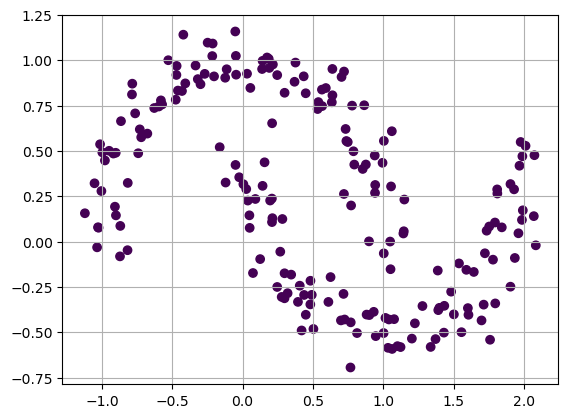

In [80]:
plt.scatter(X[:,0],X[:,1],c= y_pred)
plt.grid()
plt.show()
